In [11]:
import sys
import os
sys.path.append(os.path.abspath("python_files"))

import numpy as np
import util
from linear_model import LinearModel
from logistic import LogisticRegression
from gda_pyt import GDA

from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt



In [12]:
def plot_decision_boundaries(x, y, theta_gda, theta_log):
    plt.figure()
    # Data
    plt.scatter(x[y==0][:,0], x[y==0][:,1], label="Class 0", marker='o')
    plt.scatter(x[y==1][:,0], x[y==1][:,1], label="Class 1", marker='x')

    # Shared x1 grid
    x1_vals = np.linspace(x[:,0].min(), x[:,0].max(), 100)

    # GDA line
    t0, t1, t2 = theta_gda
    x2_gda = -(t0 + t1 * x1_vals) / t2
    plt.plot(x1_vals, x2_gda, label="GDA", color='green')

    # LogReg line
    u0, u1, u2 = theta_log
    x2_log = -(u0 + u1 * x1_vals) / u2
    plt.plot(x1_vals, x2_log, label="LogReg", color='blue', linestyle='--')

    plt.xlabel("x1"); plt.ylabel("x2")
    plt.title("GDA vs. Logistic Regression")
    plt.legend(); plt.grid(True)
    plt.show()

GDA acc = 0.8300


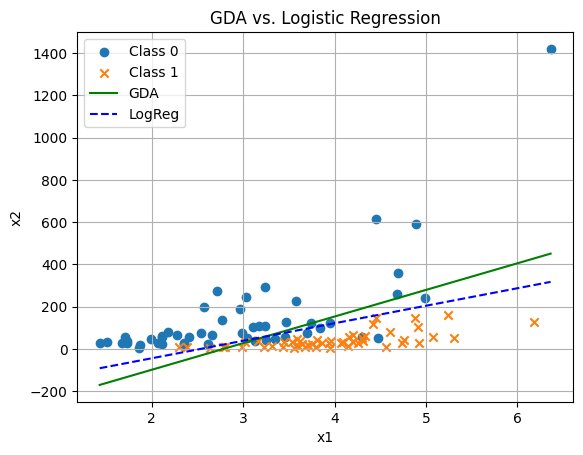

In [14]:
def main(train_path, eval_path, pred_path):
    x_train, y_train = util.load_dataset(train_path, add_intercept=False)
    x_eval,  y_eval  = util.load_dataset(eval_path,  add_intercept=False)

    # --- GDA ---
    clf_gda = GDA()
    clf_gda.fit(x_train, y_train)
    y_pred_gda = clf_gda.predict(x_eval)
    print(f"GDA acc = {accuracy_score(y_eval, y_pred_gda):.4f}")

    # --- LogReg (from ps1_b) ---

    x_train_i, _      = util.load_dataset(train_path, add_intercept=True)
    x_eval_i,  _      = util.load_dataset(eval_path,  add_intercept=True)

    clf_log = LogisticRegression()   # or whatever class name they used
    clf_log.fit(x_train_i, y_train)
    theta_log = clf_log.theta              # should be shape (n+1,)

    # Save GDA preds only, or both if you want
    np.savetxt(pred_path, y_pred_gda)

    # Plot if 2D
    if x_eval.shape[1] == 2:
        plot_decision_boundaries(x_eval, y_eval, clf_gda.theta, theta_log)


if __name__ == "__main__":
    main("data/ds1_train.csv", "data/ds1_valid.csv", "output/predictions_compare.txt")